In [1]:
import tribolium_clustering as tc
import pyclesperanto_prototype as cle
import numpy as np
from plotly.graph_objs import FigureWidget
from plotly.callbacks import Points, InputDeviceState
import pandas as pd
import numpy as np
import umap
from ipywidgets import HBox, VBox, Button
from functools import partial
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

finster_location = tc.get_folder_path()
finster = tc.processed_dataset(finster_location)

thesis_props_uncorr = finster.get_combined_thesis_props_no_correlation()
scaled = StandardScaler().fit_transform(thesis_props_uncorr)

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Finsterwalde Gastrulation Labels (new timeframe)//


In [2]:
embedder = umap.UMAP(n_neighbors=400,random_state=42)
embedding = embedder.fit_transform(scaled)

In [3]:
#cut embedding into more manageable parts
embedding.shape

(118132, 2)

In [5]:
embedding_slice_1 = embedding[:30000,:]
embedding_slice_2 = embedding[30000:60000,:]
embedding_slice_3 = embedding[60000:90000,:]
embedding_slice_4 = embedding[90000:11832,:]

In [9]:
embedding_df = pd.DataFrame(embedding, columns=['UMAP_d1', 'UMAP_d2'])
N = len(embedding_df)

# making the plot with treee data structure
f1 = FigureWidget(**{
    'data': [{'marker': {'cmax': 1.5,
                         'cmin': -0.5,
                         'color': np.zeros(N),
                         'colorbar': {'ticks': 'outside', 'ticktext': ['unselected', 'selected'], 'tickvals': [0, 1]},
                         'colorscale': [[0, 'gray'], [0.5, 'gray'],
                                        [0.5, 'red'], [1, 'red']],
                         'showscale': False,
                         'size': 4},
              'mode': 'markers',
              'type': 'scattergl',
              'uid': '9fb32f14-6f15-11e8-973c-645aede86e5b',
              'x': embedding[:,0],
              'y': embedding[:,1]}],
    'layout': {'dragmode': 'lasso', 'width': 1000, 'height':1000}
})
scatt1 = f1.data[0]

# Configure brush on both plots to update both plots
def brush(trace, points, state):
    inds = np.array(points.point_inds)
    if inds.size:
        selected = scatt1.marker.color.copy()
        selected[inds] = 1
        scatt1.marker.color = selected
    
scatt1.on_selection(brush)


# Reset brush
def reset_brush(btn):
    selected = np.zeros(N)
    scatt1.marker.color = selected

# Create reset button
button = Button(description="clear")
button.on_click(reset_brush)

dashboard = VBox([HBox([f1]), button])
dashboard

    'data': [{'marker': {'cmax': 1.5,
                         'c…

In [10]:
# first selection
weird_blob = scatt1.selectedpoints

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


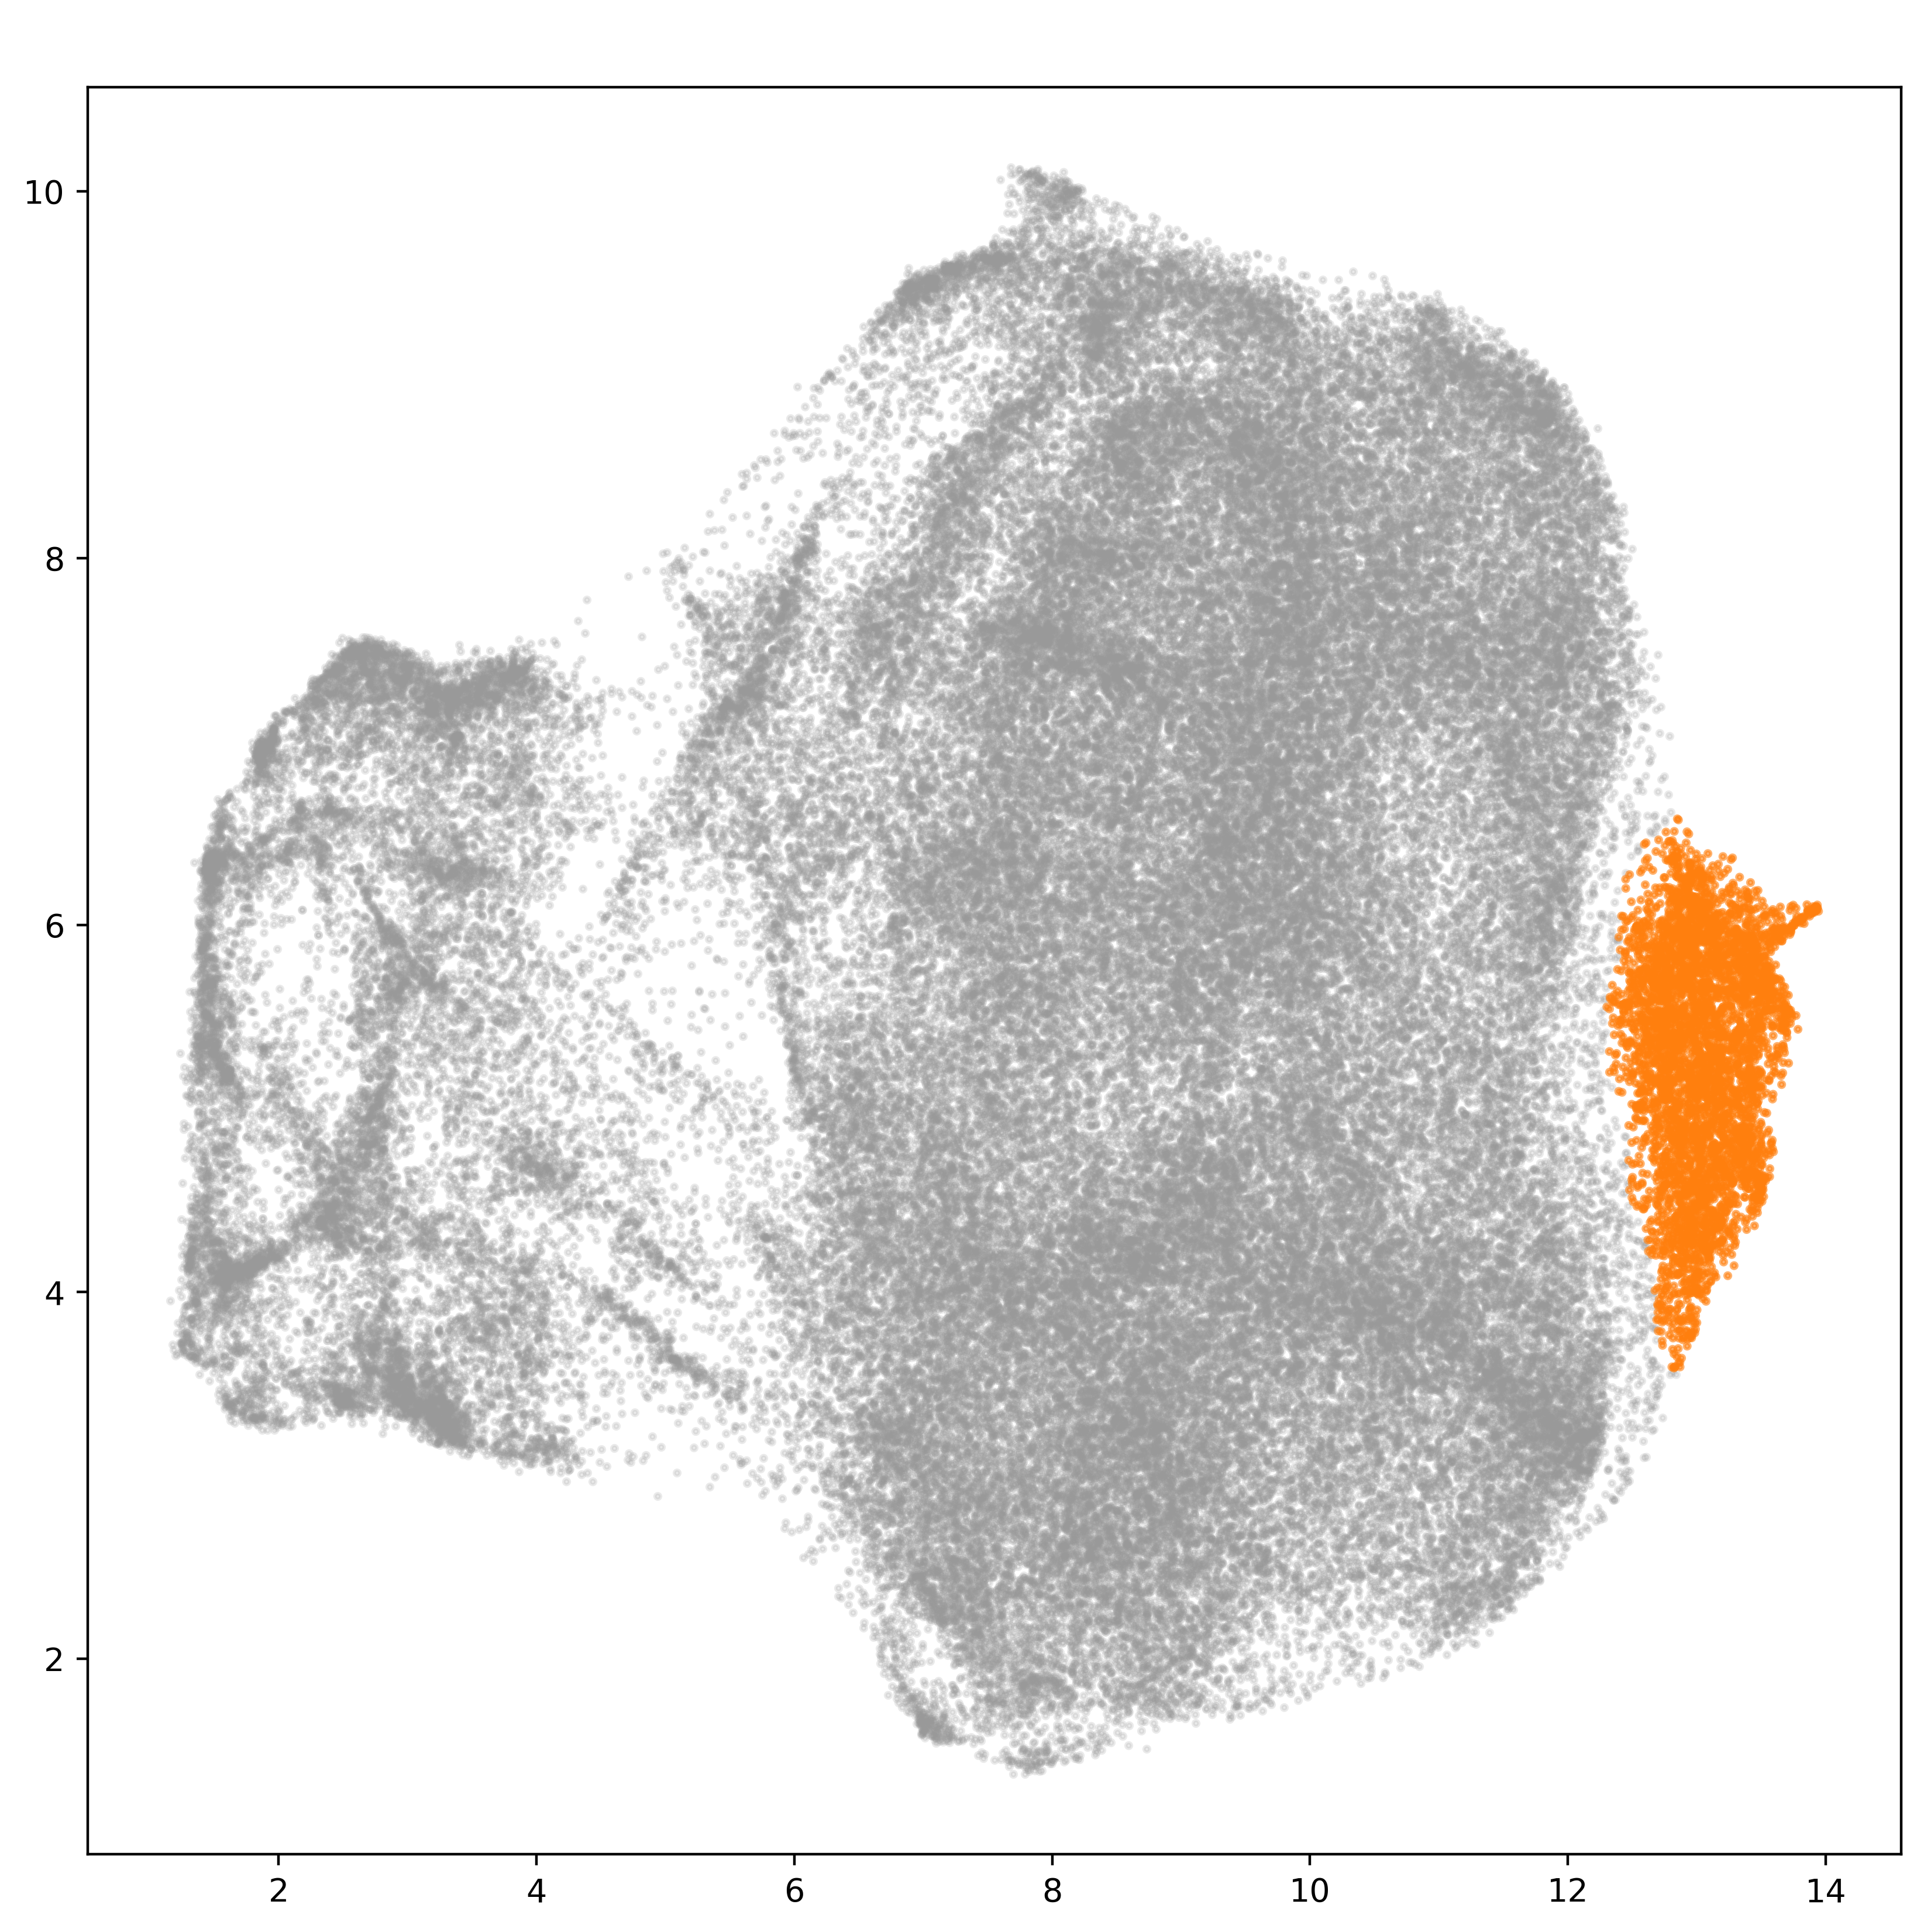

In [16]:
custom_labels = np.full(N,-1)
for i in range(N):
    if i in weird_blob:
        custom_labels[i] = 1
        
tc.plot_predictions_onto_scatter_plot(prediction=custom_labels,datax=embedding[:,0], datay= embedding[:,1],spot_size = 3, non_noise_alpha = 0.6)

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Finsterwalde Gastrulation Labels (new timeframe)//


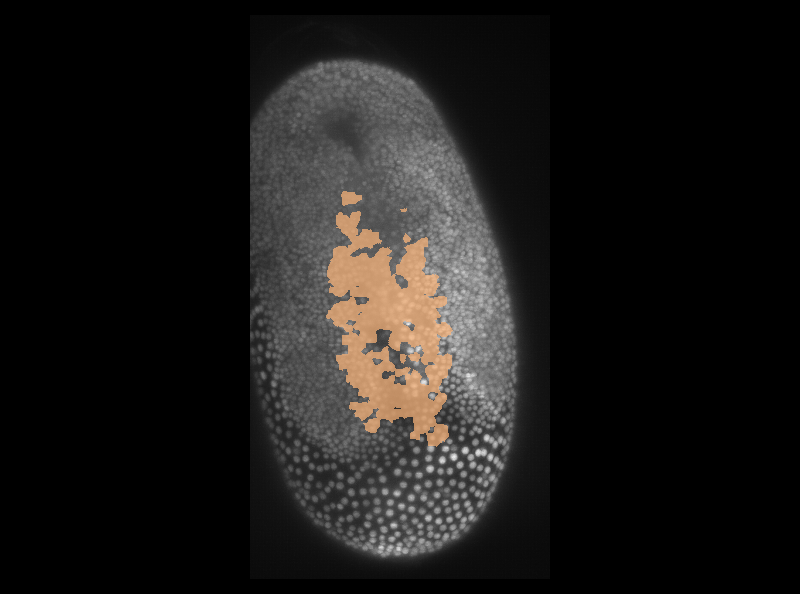

In [17]:
def gen_cluster_image_and_orig_image_from_dataset(dataset,timepoint,prediction, all_timepoint_predictionlist = True):
    from tribolium_clustering.data_visualisation import generate_parametric_cluster_image
    from pyclesperanto_prototype import push
    
    labels      = dataset.get_labels(timepoint)
    orig_image  = dataset.get_intensity_image(timepoint)
    cum_indices = dataset.cumulative_label_lengths()
    
    
    if all_timepoint_predictionlist:
        timepoint_pred = prediction[cum_indices[timepoint]:cum_indices[timepoint+1]]
    else:
        timepoint_pred = prediction
    
    cluster_image = generate_parametric_cluster_image(labels, push(labels), timepoint_pred)
    
    return cluster_image, orig_image

np_cmap = tc.napari_label_cmap()
rot_lund = (0,180,0)
import napari

img_5cl_t0, original_img_t0 = gen_cluster_image_and_orig_image_from_dataset(finster,0,custom_labels)

viewer = napari.Viewer(ndisplay=3)
viewer.add_image(original_img_t0, rotate=rot_lund)
viewer.add_labels(img_5cl_t0,rotate=rot_lund,color = np_cmap)

napari.utils.nbscreenshot(viewer,canvas_only=True)

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Finsterwalde Gastrulation Labels (new timeframe)//


C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning:

Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.

C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning:

Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.

C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning:

Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.

C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning:

Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or sh

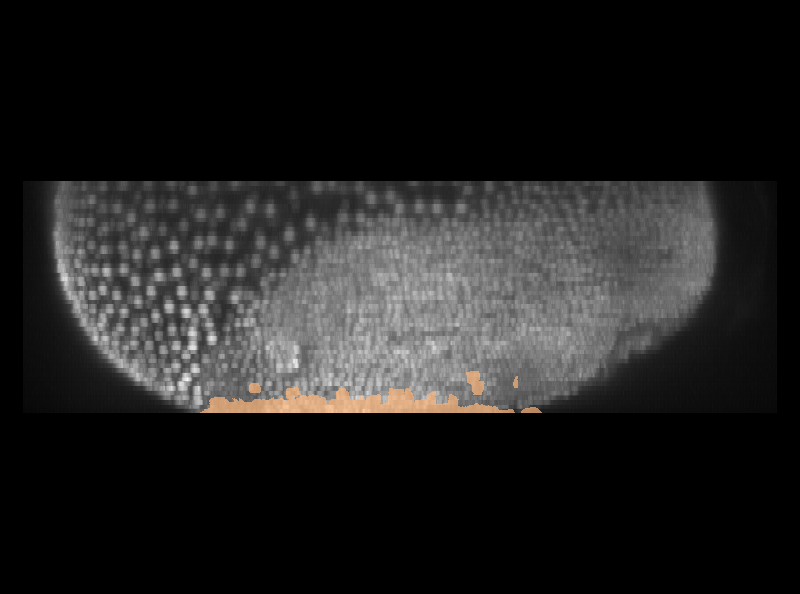

In [18]:
rot_lund = (90,180,90)

img_5cl_t0, original_img_t0 = gen_cluster_image_and_orig_image_from_dataset(finster,0,custom_labels)
viewer.close()
viewer = napari.Viewer(ndisplay=3)
viewer.add_image(original_img_t0, rotate=rot_lund)
viewer.add_labels(img_5cl_t0,rotate=rot_lund,color = np_cmap)

napari.utils.nbscreenshot(viewer,canvas_only=True)

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Finsterwalde Gastrulation Labels (new timeframe)//


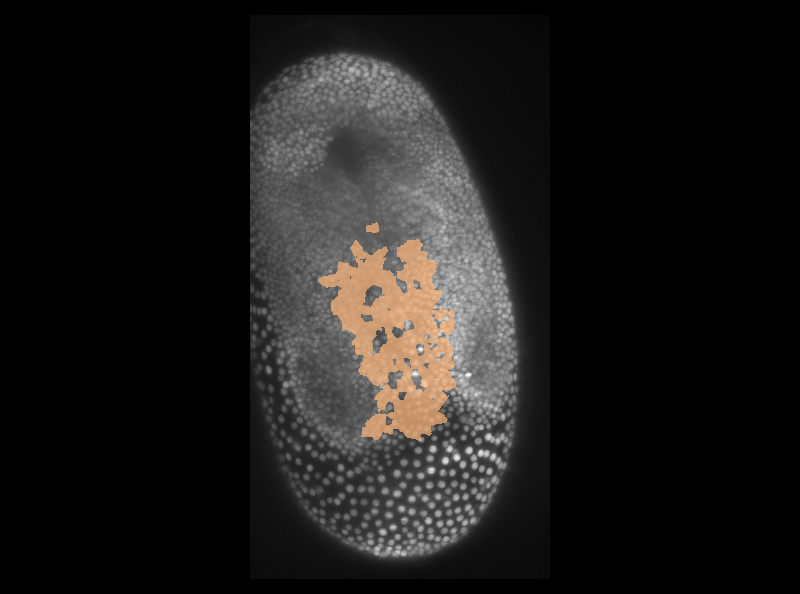

In [19]:
img_5cl_t0, original_img_t0 = gen_cluster_image_and_orig_image_from_dataset(finster,6,custom_labels)
rot_lund = (0,180,0)
viewer.close()
viewer = napari.Viewer(ndisplay=3)
viewer.add_image(original_img_t0, rotate=rot_lund)
viewer.add_labels(img_5cl_t0,rotate=rot_lund,color = np_cmap)

napari.utils.nbscreenshot(viewer,canvas_only=True)

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Finsterwalde Gastrulation Labels (new timeframe)//


C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning:

Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.

C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning:

Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.

C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning:

Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.

C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning:

Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or sh

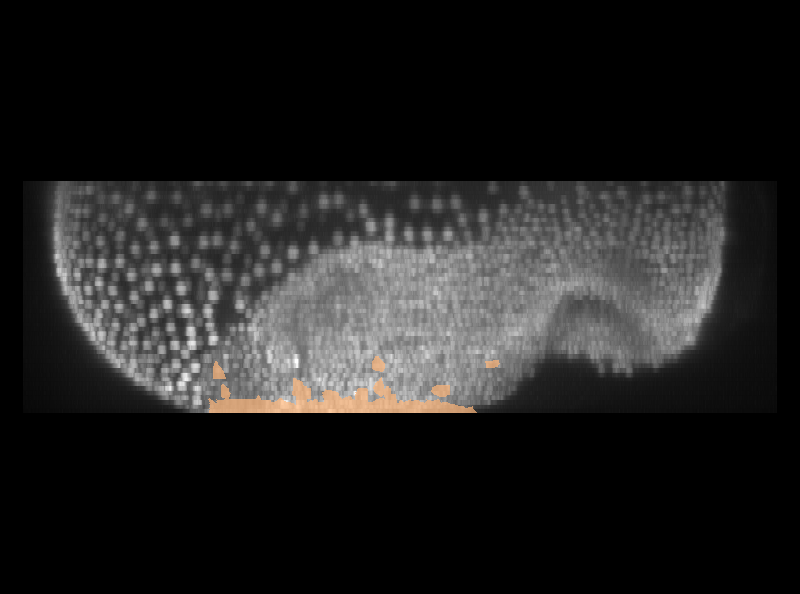

In [20]:
rot_lund = (90,180,90)

img_5cl_t0, original_img_t0 = gen_cluster_image_and_orig_image_from_dataset(finster,6,custom_labels)
viewer.close()
viewer = napari.Viewer(ndisplay=3)
viewer.add_image(original_img_t0, rotate=rot_lund)
viewer.add_labels(img_5cl_t0,rotate=rot_lund,color = np_cmap)

napari.utils.nbscreenshot(viewer,canvas_only=True)

In [21]:
finsterwalde_blob_investigation_folder = tc.get_folder_path('blob investigation')
np.save(finsterwalde_blob_investigation_folder+'embedding 2D nneighbours 400.npy',embedding)
np.save(finsterwalde_blob_investigation_folder+'labelled blob list.npy',custom_labels)

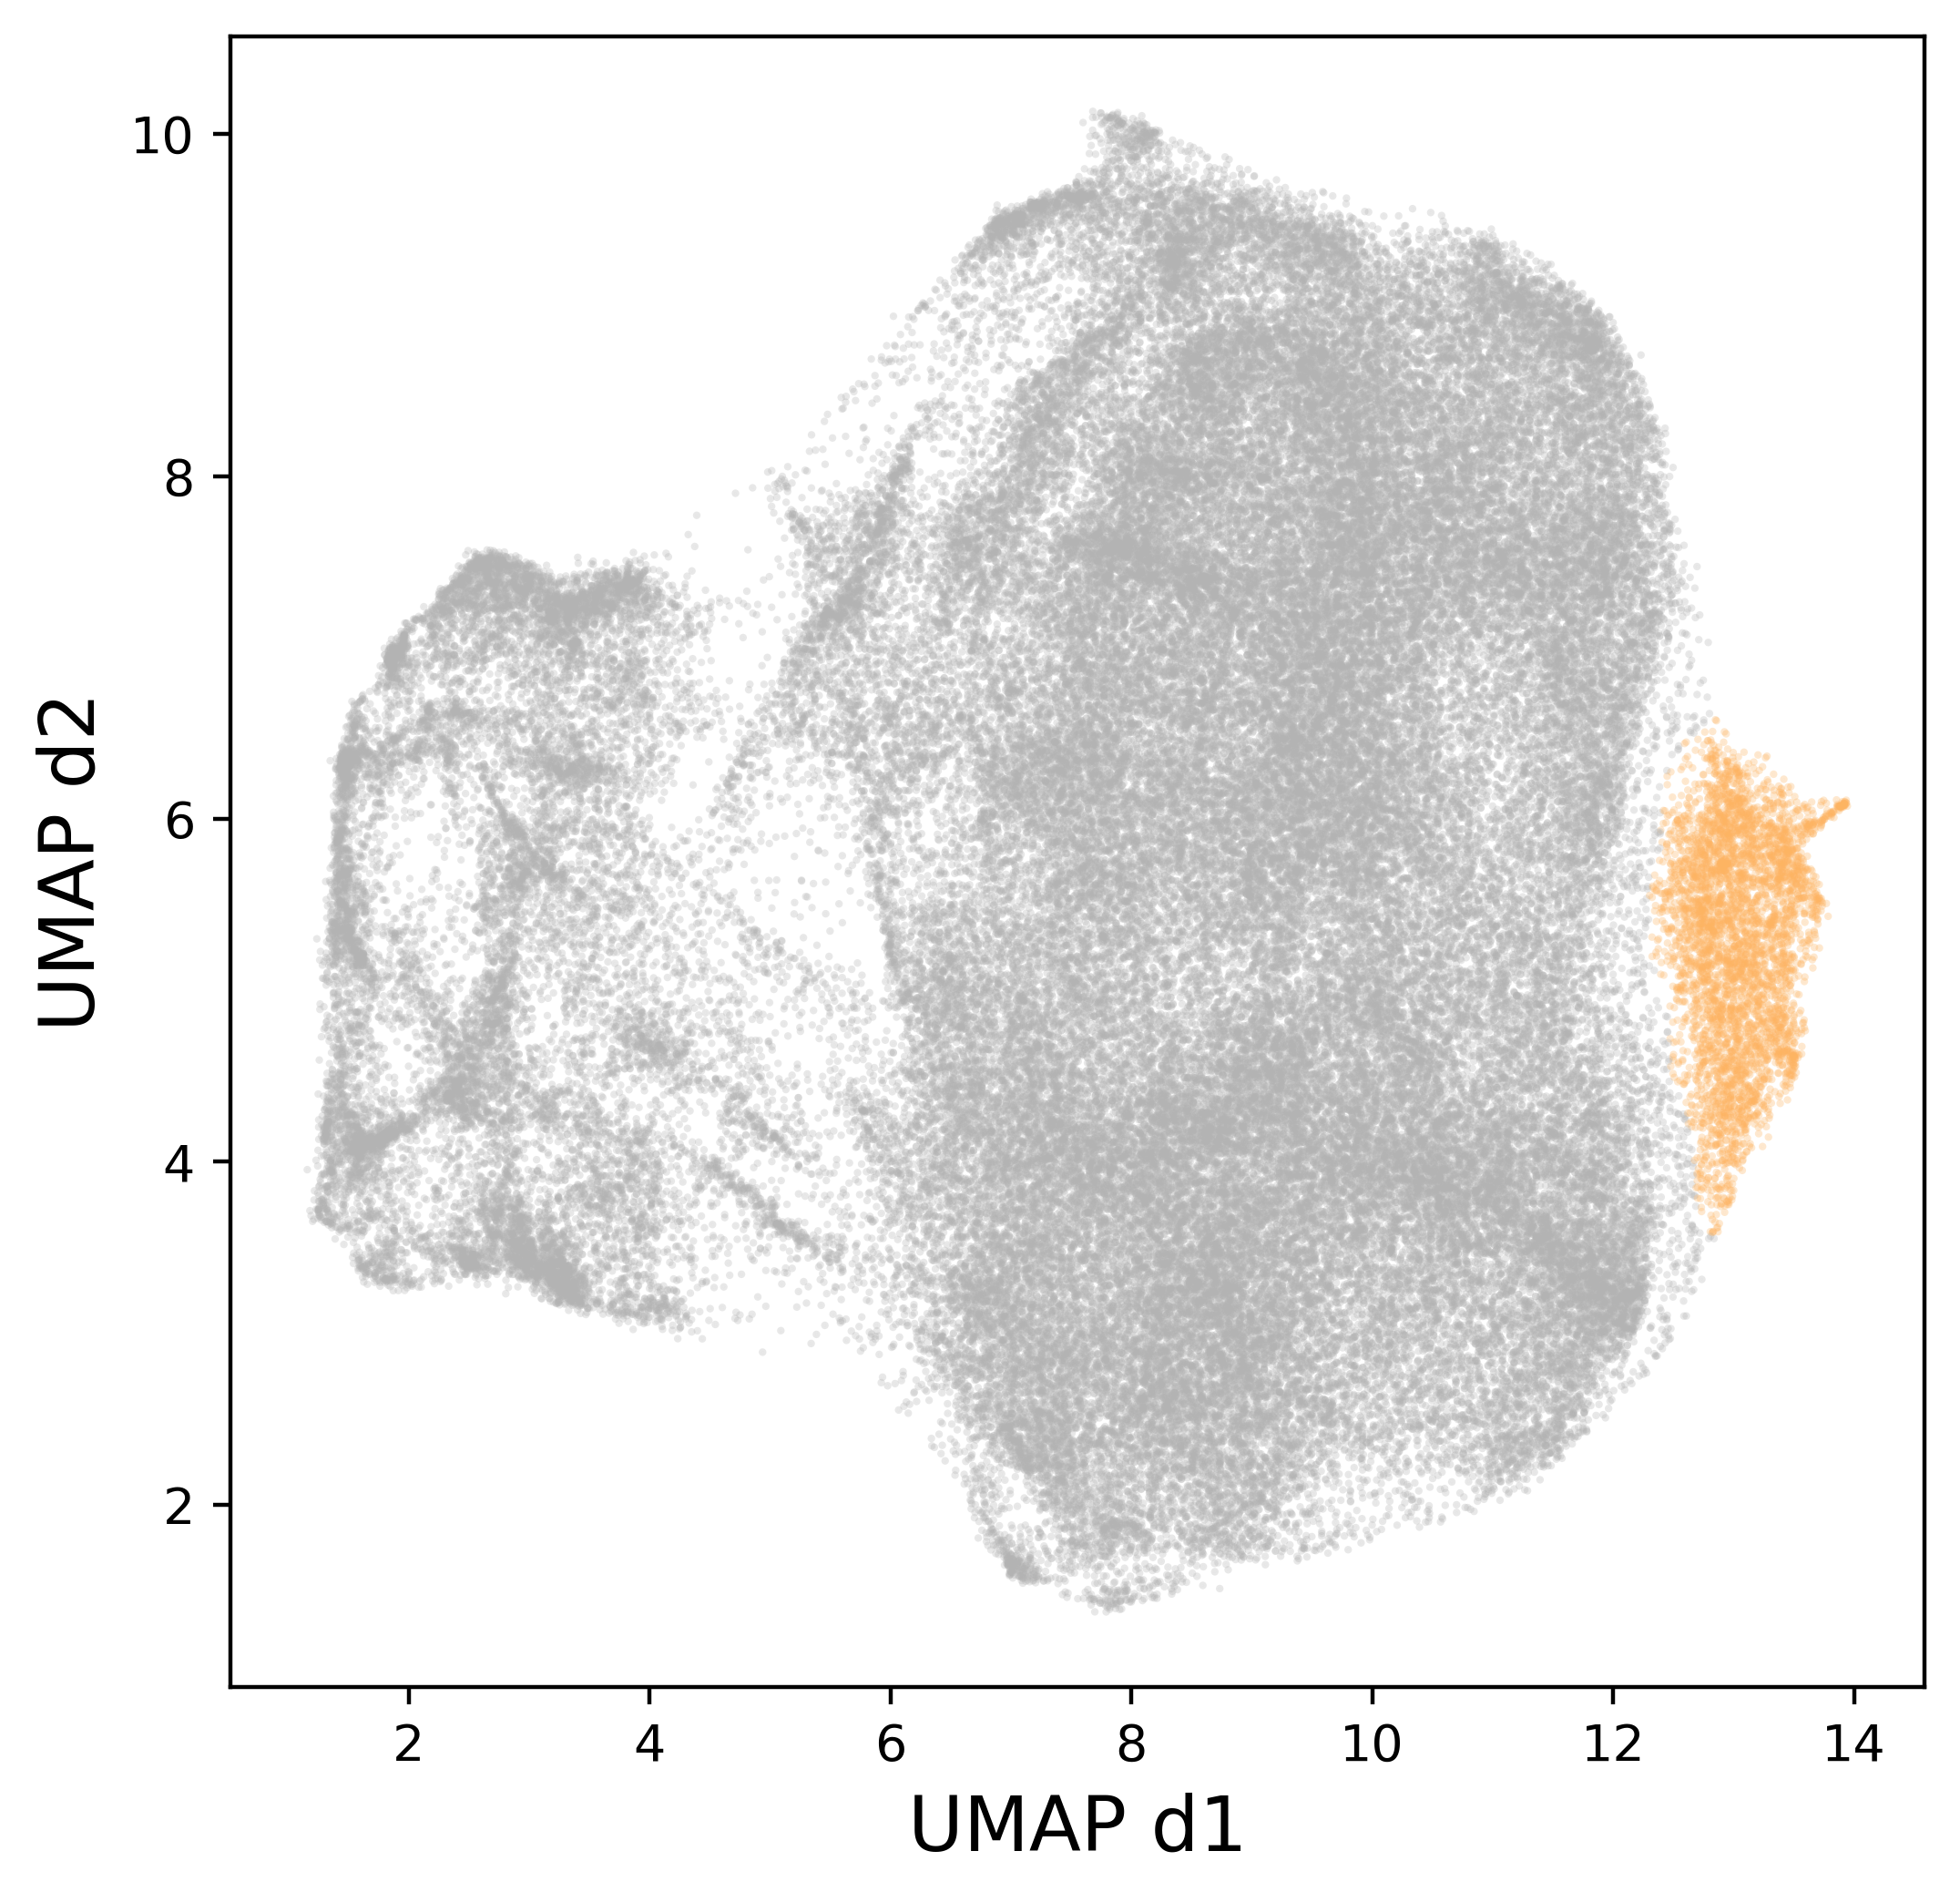

In [27]:
spot_size = 0.25
font_size_title = 18
font_size_axis = 15

plot_cmap = tc.plot_cmap()

fig, axs = plt.subplots(1,1, figsize = (6,6))
axs.scatter(embedding[:,0],embedding[:,1], s = spot_size, alpha = 0.3, c = [plot_cmap[i] for i in custom_labels])
axs.set_xlabel('UMAP d1', fontsize =font_size_axis)
axs.set_ylabel('UMAP d2', fontsize =font_size_axis)
plt.savefig(finsterwalde_blob_investigation_folder + 'UMAP with Custom Labels.png', dpi =  400, format = 'png')


In [ ]:
def plot_umap_and_save_thesis_img(embedding, filename, folder, spot_size = 1, 
                                  font_size_title = 18, font_size_axis = 15):
    fig, axs = plt.subplots(1,1, figsize = (6,6))
    axs.scatter(embedding[:,0],embedding[:,1], s = spot_size, alpha = 0.3, c = 'black')
    axs.set_xlabel('UMAP d1', fontsize =font_size_axis)
    axs.set_ylabel('UMAP d2', fontsize =font_size_axis)
    plt.savefig(folder + filename +'.png', dpi =  400, format = 'png')